* get mosaiks geometry (CRS missing) 
* write functions to get geometry of mosaiks
* join mosaiks and poverty



When training a model, do the de-mean approach (or at least try both and compare).

In [1]:
import pickle
from pathlib import Path
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

import child_poverty_iraq.data.load_data as ld
import child_poverty_iraq.utils.constants as c

# Mosaiks

In [2]:
mosaiks_adm1 = ld.get_mosaiks_adm1()
print(mosaiks_adm1.shape)
mosaiks_adm1.head(2)

(2849, 4001)


,ADM1_shape,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_3990,X_3991,X_3992,X_3993,X_3994,X_3995,X_3996,X_3997,X_3998,X_3999
0,AFG-ADM1-3_0_0-B1,0.221817,0.595860,0.027869,0.822692,0.362865,0.315121,0.036010,0.042699,0.777227,...,0.076052,0.027038,0.117758,0.079705,0.076191,0.589121,0.547973,0.176470,0.468623,0.013120
1,AFG-ADM1-3_0_0-B10,0.146467,0.415417,0.042324,0.320048,0.247005,0.393481,0.085266,0.104986,0.266778,...,0.176959,0.079718,0.313601,0.206565,0.142533,0.690189,1.129587,0.354073,0.446426,0.045413


In [3]:
geom_mos_adm1 = ld.get_mosaiks_geom_adm1()

The file '../data/external/geoBoundariesCGAZ_ADM1.topojson' exists.


In [4]:
print(geom_mos_adm1.shape)
geom_mos_adm1.head(2)

(3291, 9)


,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,ADM0_shapeID,ADMHIERARCHY,geometry
0,NaN,Isle of Youth,CU-99,CUB-ADM1-3_0_0-B1,CUB,ADM1,CUB-ADM0-3_0_0-B1,CUB-ADM1-3_0_0-B1|CUB-ADM0-3_0_0-B1,"MULTIPOLYGON (((-81.40194 21.68767, -81.40168 ..."
1,NaN,Havana,CU-03,CUB-ADM1-3_0_0-B2,CUB,ADM1,CUB-ADM0-3_0_0-B1,CUB-ADM1-3_0_0-B2|CUB-ADM0-3_0_0-B1,"POLYGON ((-82.09676 23.17242, -82.09666 23.171..."


* Understand which is the CRS of file

In [5]:
# Set the CRS
geom_mos_adm1.crs =  'EPSG:4326'

In [6]:
geom_mos_adm1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
mosaiks_adm1 = pd.merge(mosaiks_adm1, geom_mos_adm1, how='left', left_on='ADM1_shape', right_on='shapeID')
print(mosaiks_adm1.shape)
mosaiks_adm1.head(2)

(2849, 4010)


,ADM1_shape,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_3999,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,ADM0_shapeID,ADMHIERARCHY,geometry
0,AFG-ADM1-3_0_0-B1,0.221817,0.595860,0.027869,0.822692,0.362865,0.315121,0.036010,0.042699,0.777227,...,0.013120,NaN,Ghor,AF-GHO,AFG-ADM1-3_0_0-B1,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B1|AFG-ADM0-3_0_0-B1,"POLYGON ((65.63424 33.67222, 65.62959 33.67345..."
1,AFG-ADM1-3_0_0-B10,0.146467,0.415417,0.042324,0.320048,0.247005,0.393481,0.085266,0.104986,0.266778,...,0.045413,NaN,Khost,AF-KHO,AFG-ADM1-3_0_0-B10,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B10|AFG-ADM0-3_0_0-B1,"POLYGON ((70.01106 33.72774, 70.01443 33.72788..."


In [8]:
# Check missing values in merging
mosaiks_adm1[mosaiks_adm1['geometry'].isnull()]
# SLV --- El salvador

,ADM1_shape,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_3999,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,ADM0_shapeID,ADMHIERARCHY,geometry
2151,SLV-ADM1-3_0_0-B1,0.137027,0.213253,0.226659,0.023241,0.140888,0.291179,0.360282,0.887646,0.010079,...,0.165848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [9]:
# Drop rows with missing geometry
mosaiks_adm1 = mosaiks_adm1.dropna(subset=['geometry'])
print(mosaiks_adm1.shape)

(2848, 4010)


In [10]:
# Transform in geo dataframe
mosaiks_adm1 = gpd.GeoDataFrame(mosaiks_adm1, geometry='geometry')

# Poverty

In [11]:
pov_adm1 = ld.get_poverty_adm1()
print(pov_adm1.shape)
pov_adm1.head(2)

(1110, 13)


,countrycode,survey,survey_round,year_chpov,deprived_sev,deprived_mod,sumpoor_sev,sumpoor_mod,nat_deprived_sev,nat_deprived_mod,geocode,popnational0017,pop0017
0,AFG,DHS,71.0,2015.0,94.106728,99.041710,1.767125,2.363397,82.904877,93.396584,AFG_ADM1_272,19895792.0,795903.94
1,AFG,DHS,71.0,2015.0,90.175560,96.397911,1.727377,2.420170,82.904877,93.396584,AFG_ADM1_273,19895792.0,440900.22


In [12]:
geom_pov_adm1 = ld.get_poverty_geom_adm1()
print(geom_pov_adm1.shape)
geom_pov_adm1.head(2)

100%|██████████| 176/176 [00:32<00:00,  5.47it/s]


(2554, 5)


,fid,REF_AREA,SUBREGION_NAME,SUBREGION,geometry
0,1390,MMR,Ayeyarwady,MMR_SVY1_1_1,"MULTIPOLYGON (((94.64847 16.25050, 94.65144 16..."
1,1391,MMR,Bago,MMR_SVY1_2_1,"MULTIPOLYGON (((96.90305 16.80917, 96.90833 16..."


Ho rimosso CAN, USA e MLT perchè avevano dei tmp.crs diversi così mi sono semplificata il lavoro

In [13]:
pov_adm1 = pd.merge(pov_adm1, geom_pov_adm1, how='left', left_on='geocode', right_on ='SUBREGION')
pov_adm1 = gpd.GeoDataFrame(pov_adm1, geometry='geometry')

print(pov_adm1.shape)
pov_adm1.head(2)

(1110, 18)


,countrycode,survey,survey_round,year_chpov,deprived_sev,deprived_mod,sumpoor_sev,sumpoor_mod,nat_deprived_sev,nat_deprived_mod,geocode,popnational0017,pop0017,fid,REF_AREA,SUBREGION_NAME,SUBREGION,geometry
0,AFG,DHS,71.0,2015.0,94.106728,99.041710,1.767125,2.363397,82.904877,93.396584,AFG_ADM1_272,19895792.0,795903.94,2111.0,AFG,Badakhshan,AFG_ADM1_272,"MULTIPOLYGON (((71.00345 38.47583, 71.03115 38..."
1,AFG,DHS,71.0,2015.0,90.175560,96.397911,1.727377,2.420170,82.904877,93.396584,AFG_ADM1_273,19895792.0,440900.22,2112.0,AFG,Badghis,AFG_ADM1_273,"MULTIPOLYGON (((63.91477 35.86124, 63.89734 35..."


There is a problem with "COL" and "DOM". Their SUBREGION's codes has this format 'COL_SVY1_2015397001' instead of 'COL_ADM1_934' this one.

In [14]:
pov_adm1[pov_adm1['countrycode']=='COL'].head(2)

,countrycode,survey,survey_round,year_chpov,deprived_sev,deprived_mod,sumpoor_sev,sumpoor_mod,nat_deprived_sev,nat_deprived_mod,geocode,popnational0017,pop0017,fid,REF_AREA,SUBREGION_NAME,SUBREGION,geometry
219,COL,DHS,71.0,2015.0,28.465214,52.167397,0.392309,0.804881,19.797577,37.977715,COL_SVY1_2015397001,NaN,NaN,NaN,NaN,NaN,NaN,None
220,COL,DHS,71.0,2015.0,17.525406,35.023830,0.219870,0.482063,19.797577,37.977715,COL_SVY1_2015397002,NaN,NaN,NaN,NaN,NaN,NaN,None


In [17]:
# Get country shapes
geom_adm0 = ld.get_mosaiks_geom_adm0()


The file '../data/external/geoBoundariesCGAZ_ADM0.topojson' exists.


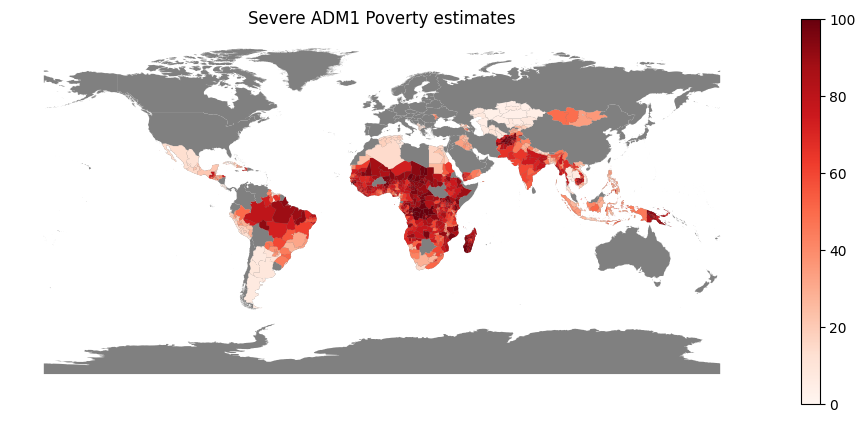

In [18]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')

# Plot countries with national poverty estimates
pov_adm1.plot(ax=ax, column='deprived_sev', cmap='Reds', legend=True, vmin=0, vmax=100)

plt.title('Severe ADM1 Poverty estimates')
plt.axis('off')
plt.show()


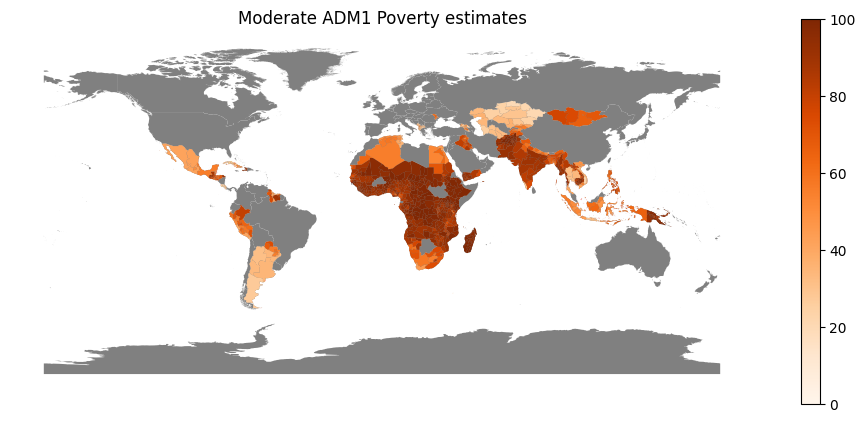

In [19]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')

# Plot countries with national poverty estimates
pov_adm1.plot(ax=ax, column='deprived_mod', cmap='Oranges', legend=True, vmin=0, vmax=100)

plt.title('Moderate ADM1 Poverty estimates')
plt.axis('off')
plt.show()


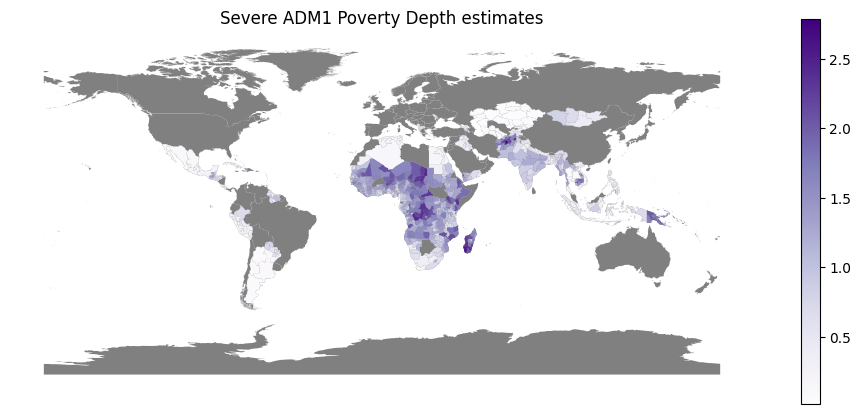

In [20]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')

# Plot countries with national poverty estimates
pov_adm1.plot(ax=ax, column='sumpoor_sev', cmap='Purples', legend=True)

plt.title('Severe ADM1 Poverty Depth estimates')
plt.axis('off')
plt.show()


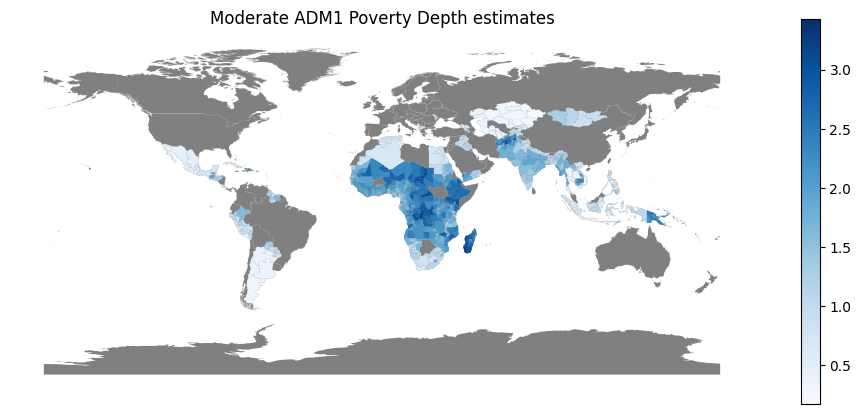

In [21]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')

# Plot countries with national poverty estimates
pov_adm1.plot(ax=ax, column='sumpoor_mod', cmap='Blues', legend=True)

plt.title('Moderate ADM1 Poverty Depth estimates')
plt.axis('off')
plt.show()


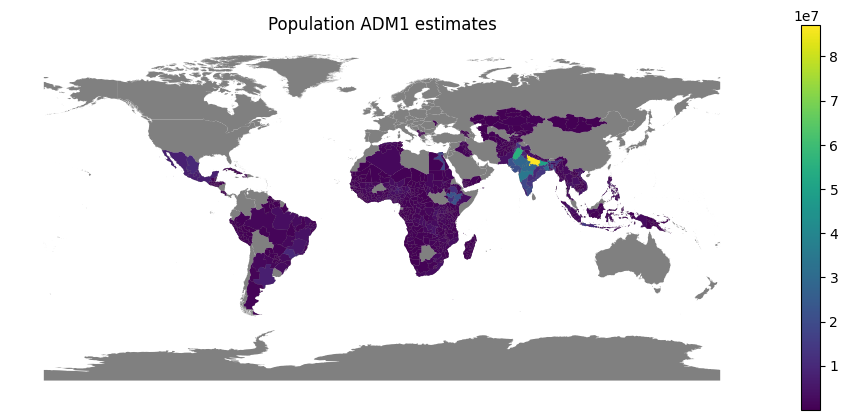

In [22]:
# Create a plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 5))

# Plot world countries
geom_adm0.plot(ax=ax, color='gray')

# Plot countries with national poverty estimates
pov_adm1.plot(ax=ax, column='pop0017', cmap='viridis', legend=True)

plt.title('Population ADM1 estimates')
plt.axis('off')
plt.show()


<Axes: >

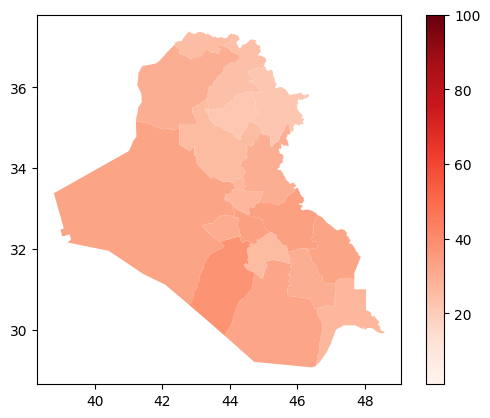

In [23]:
pov_adm1[pov_adm1['countrycode']=='IRQ'].plot(column='deprived_sev', cmap='Reds', legend=True, vmin=1, vmax=100)


<Axes: >

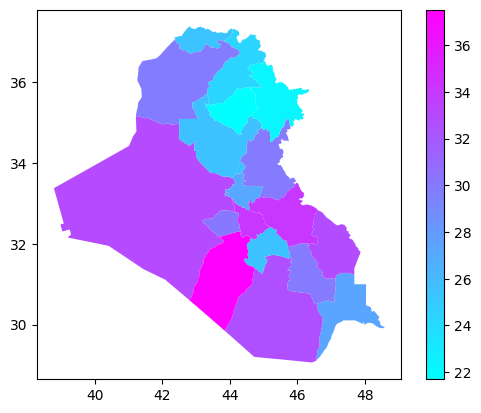

In [24]:
pov_adm1[pov_adm1['countrycode']=='IRQ'].plot(column='deprived_sev', cmap='cool', legend=True)


# Merge MOSAIKS and Poverty

In [29]:
print(pov_adm1.shape)
pov_adm1.head(1)

(1110, 18)


,countrycode,survey,survey_round,year_chpov,deprived_sev,deprived_mod,sumpoor_sev,sumpoor_mod,nat_deprived_sev,nat_deprived_mod,geocode,popnational0017,pop0017,fid,REF_AREA,SUBREGION_NAME,SUBREGION,geometry
0,AFG,DHS,71.0,2015.0,94.106728,99.04171,1.767125,2.363397,82.904877,93.396584,AFG_ADM1_272,19895792.0,795903.94,2111.0,AFG,Badakhshan,AFG_ADM1_272,"MULTIPOLYGON (((71.00345 38.47583, 71.03115 38..."


In [30]:
print(mosaiks_adm1.shape)
mosaiks_adm1.head(1)

(2848, 4010)


,ADM1_shape,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_3999,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,ADM0_shapeID,ADMHIERARCHY,geometry
0,AFG-ADM1-3_0_0-B1,0.221817,0.59586,0.027869,0.822692,0.362865,0.315121,0.03601,0.042699,0.777227,...,0.01312,NaN,Ghor,AF-GHO,AFG-ADM1-3_0_0-B1,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B1|AFG-ADM0-3_0_0-B1,"POLYGON ((65.63424 33.67222, 65.62959 33.67345..."


In [27]:
# merged_gdf = gpd.sjoin(pov_adm1, mosaiks_adm1, how='left', op='intersects')

/home/marina/miniconda3/envs/unicef_iraq/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [28]:
# merged_gdf

,countrycode,survey,survey_round,year_chpov,deprived_sev,deprived_mod,sumpoor_sev,sumpoor_mod,nat_deprived_sev,nat_deprived_mod,...,X_3998,X_3999,id,shapeName,shapeISO,shapeID,shapeGroup,shapeType,ADM0_shapeID,ADMHIERARCHY
0,AFG,DHS,71.0,2015.0,94.106728,99.041710,1.767125,2.363397,82.904877,93.396584,...,0.335466,0.088208,NaN,Khyber Pakhtunkhwa,PK-KP,PAK-ADM1-3_0_0-B8,PAK,ADM1,PAK-ADM0-3_0_0-B1,PAK-ADM1-3_0_0-B8|PAK-ADM0-3_0_0-B1
0,AFG,DHS,71.0,2015.0,94.106728,99.041710,1.767125,2.363397,82.904877,93.396584,...,0.826264,0.114912,NaN,Nuristan,AF-NUR,AFG-ADM1-3_0_0-B25,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B25|AFG-ADM0-3_0_0-B1
0,AFG,DHS,71.0,2015.0,94.106728,99.041710,1.767125,2.363397,82.904877,93.396584,...,0.847512,0.043432,NaN,Panjsher,AF-PAN,AFG-ADM1-3_0_0-B22,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B22|AFG-ADM0-3_0_0-B1
0,AFG,DHS,71.0,2015.0,94.106728,99.041710,1.767125,2.363397,82.904877,93.396584,...,0.465152,0.025283,NaN,Takhar,AF-TAK,AFG-ADM1-3_0_0-B16,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B16|AFG-ADM0-3_0_0-B1
0,AFG,DHS,71.0,2015.0,94.106728,99.041710,1.767125,2.363397,82.904877,93.396584,...,0.662995,0.025175,NaN,Badakhshan,AF-BDS,AFG-ADM1-3_0_0-B9,AFG,ADM1,AFG-ADM0-3_0_0-B1,AFG-ADM1-3_0_0-B9|AFG-ADM0-3_0_0-B1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,ZWE,MICS,6.0,2019.0,48.990791,83.311096,0.703922,1.571353,50.139332,85.116516,...,0.928844,0.036865,NaN,Mashonaland East,ZW-ME,ZWE-ADM1-3_0_0-B9,ZWE,ADM1,ZWE-ADM0-3_0_0-B1,ZWE-ADM1-3_0_0-B9|ZWE-ADM0-3_0_0-B1
1109,ZWE,MICS,6.0,2019.0,48.990791,83.311096,0.703922,1.571353,50.139332,85.116516,...,0.990670,0.068403,NaN,Harare,ZW-HA,ZWE-ADM1-3_0_0-B10,ZWE,ADM1,ZWE-ADM0-3_0_0-B1,ZWE-ADM1-3_0_0-B10|ZWE-ADM0-3_0_0-B1
1109,ZWE,MICS,6.0,2019.0,48.990791,83.311096,0.703922,1.571353,50.139332,85.116516,...,0.856401,0.022649,NaN,Mashonaland West,ZW-MC,ZWE-ADM1-3_0_0-B8,ZWE,ADM1,ZWE-ADM0-3_0_0-B1,ZWE-ADM1-3_0_0-B8|ZWE-ADM0-3_0_0-B1
1109,ZWE,MICS,6.0,2019.0,48.990791,83.311096,0.703922,1.571353,50.139332,85.116516,...,0.779619,0.024294,NaN,Mashonaland Central,ZW-MC,ZWE-ADM1-3_0_0-B4,ZWE,ADM1,ZWE-ADM0-3_0_0-B1,ZWE-ADM1-3_0_0-B4|ZWE-ADM0-3_0_0-B1
